In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('titanic-dataset/train.csv')

In [131]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


    __Data Dicionary__
    Variable	Definition	Key

    survival	Survival	0 = No, 1 = Yes

    pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

    sex	Sex	

    Age	Age in years	

    sibsp	# of siblings / spouses aboard the Titanic	

    parch	# of parents / children aboard the Titanic	

    ticket	Ticket number	

    fare	Passenger fare	

    cabin	Cabin number	

    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [396]:
df.shape

(891, 12)

In [397]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data we are working with would be a __BINARY CLASSIFICATION__ because we want to know who survives or not

In [398]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [399]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [400]:
# lets normalize it
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

We can observe that `0.616162% survived` while `0.383838% not survived`

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

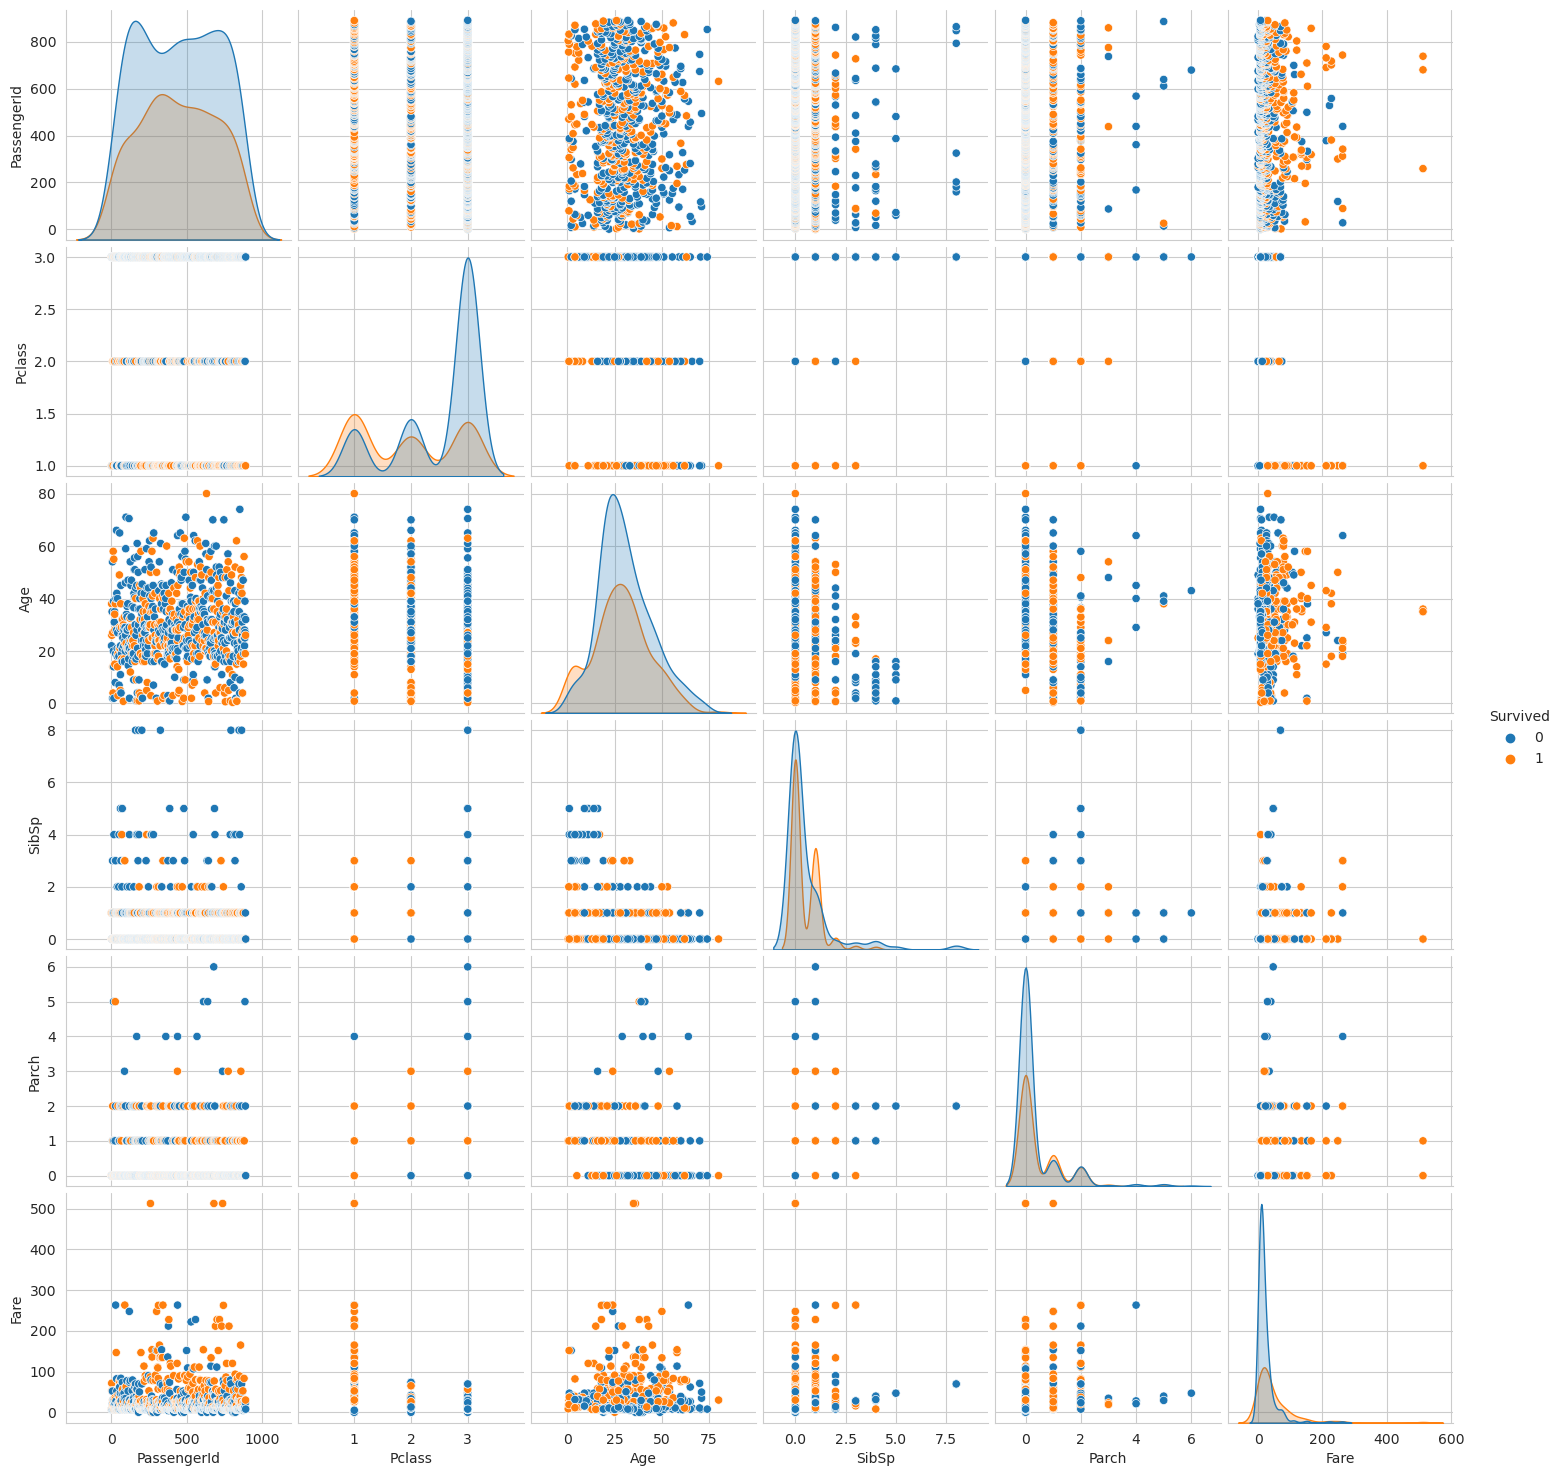

In [401]:
sns.pairplot(df, hue='Survived')

In [555]:
# missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

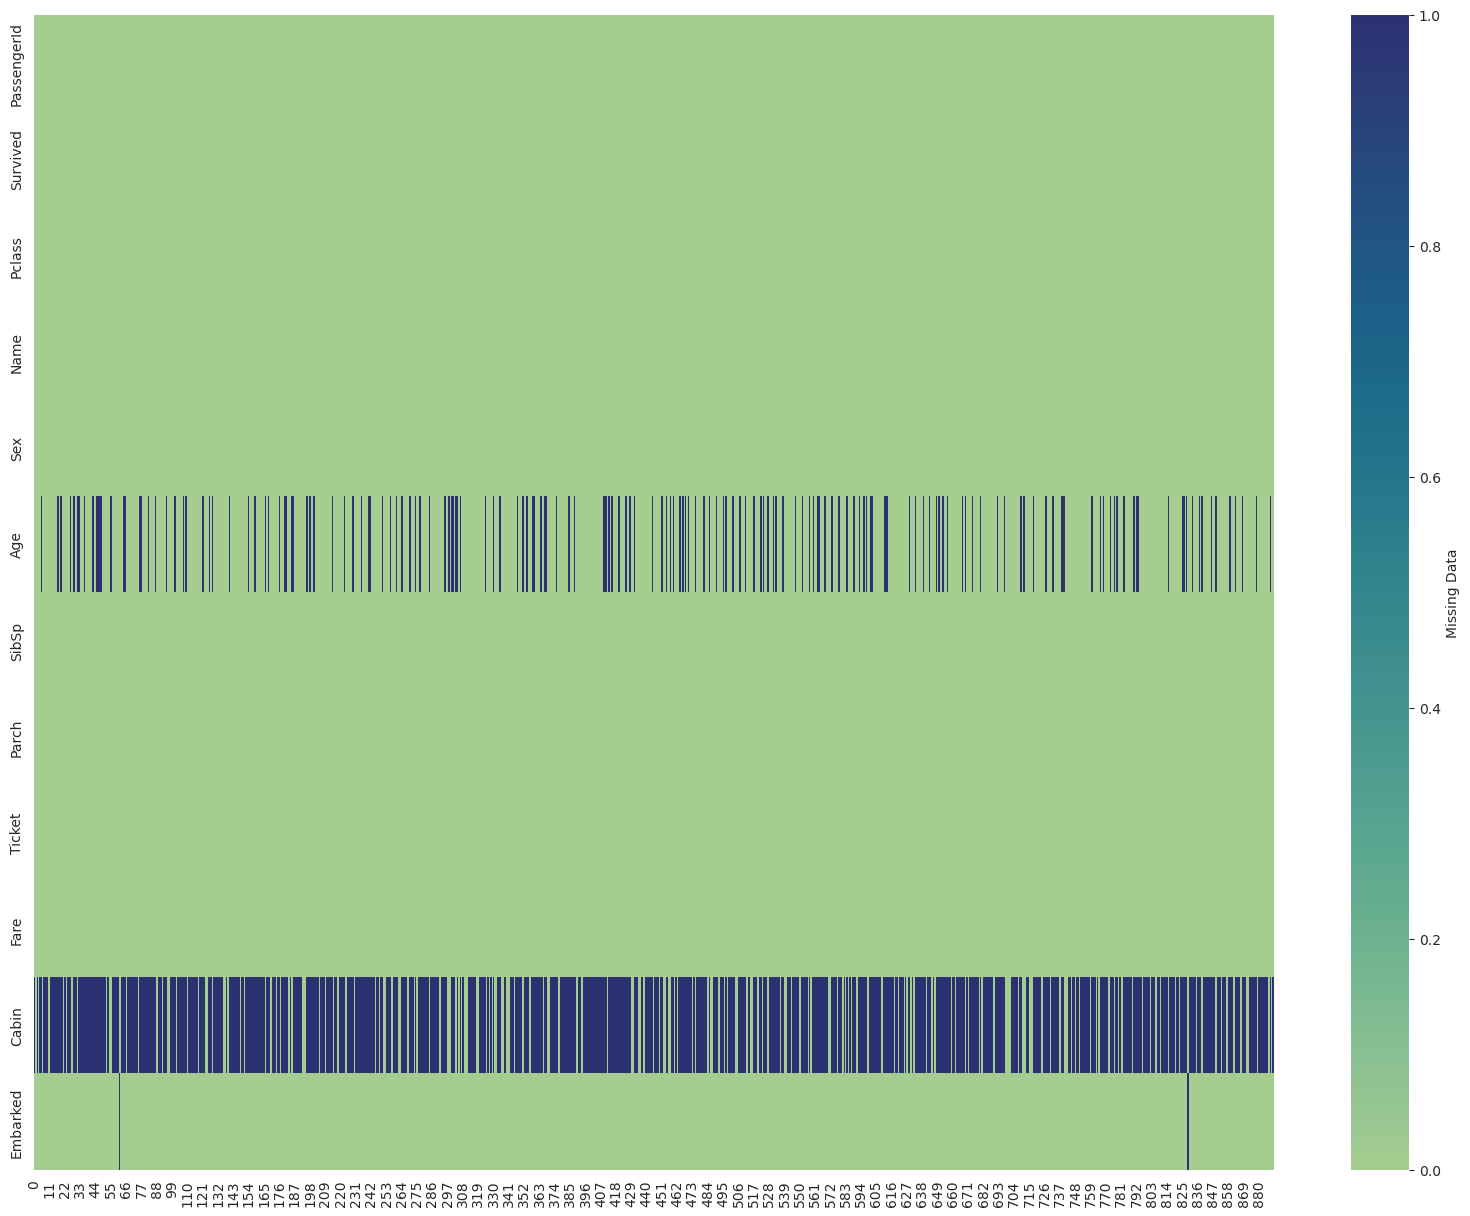

In [403]:
# heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.isna().transpose(), cmap='crest', cbar_kws={'label': 'Missing Data'})

In [404]:
# checking correlation of Ticket
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Drop columns that has no use as inference for our analysis

In [556]:
df1 = df.drop(columns=['PassengerId','Ticket','Cabin'])

In [557]:
df1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [558]:
df1.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S


#### EDA process

In [559]:
# Convert 'data type
df1['Survived'] = df1['Survived'].astype('category')
df1['Pclass'] = df1['Pclass'].astype('str')
df1['SibSp'] = df1['SibSp'].astype('str')

In [513]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    object  
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    object  
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 56.8+ KB


#### countplot of those who survived

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


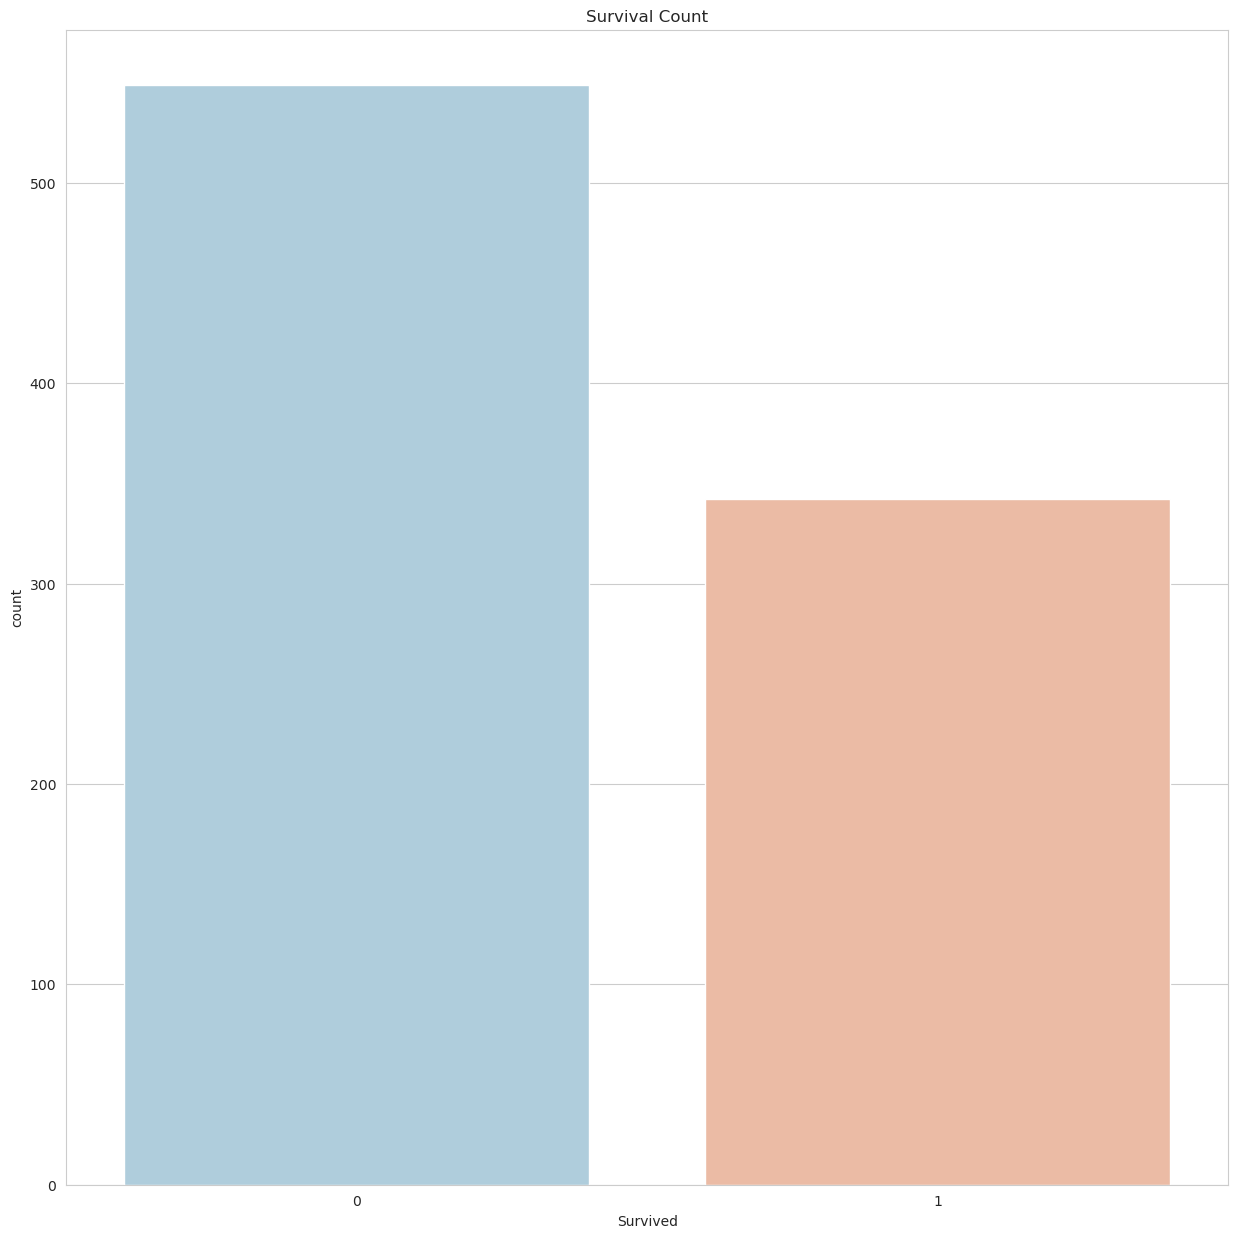

In [410]:
plt.figure(figsize=(15,15))
plt.title('Survival Count')
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df1, palette='RdBu_r')
plt.show()

##### countplot of those who survived based on sex

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


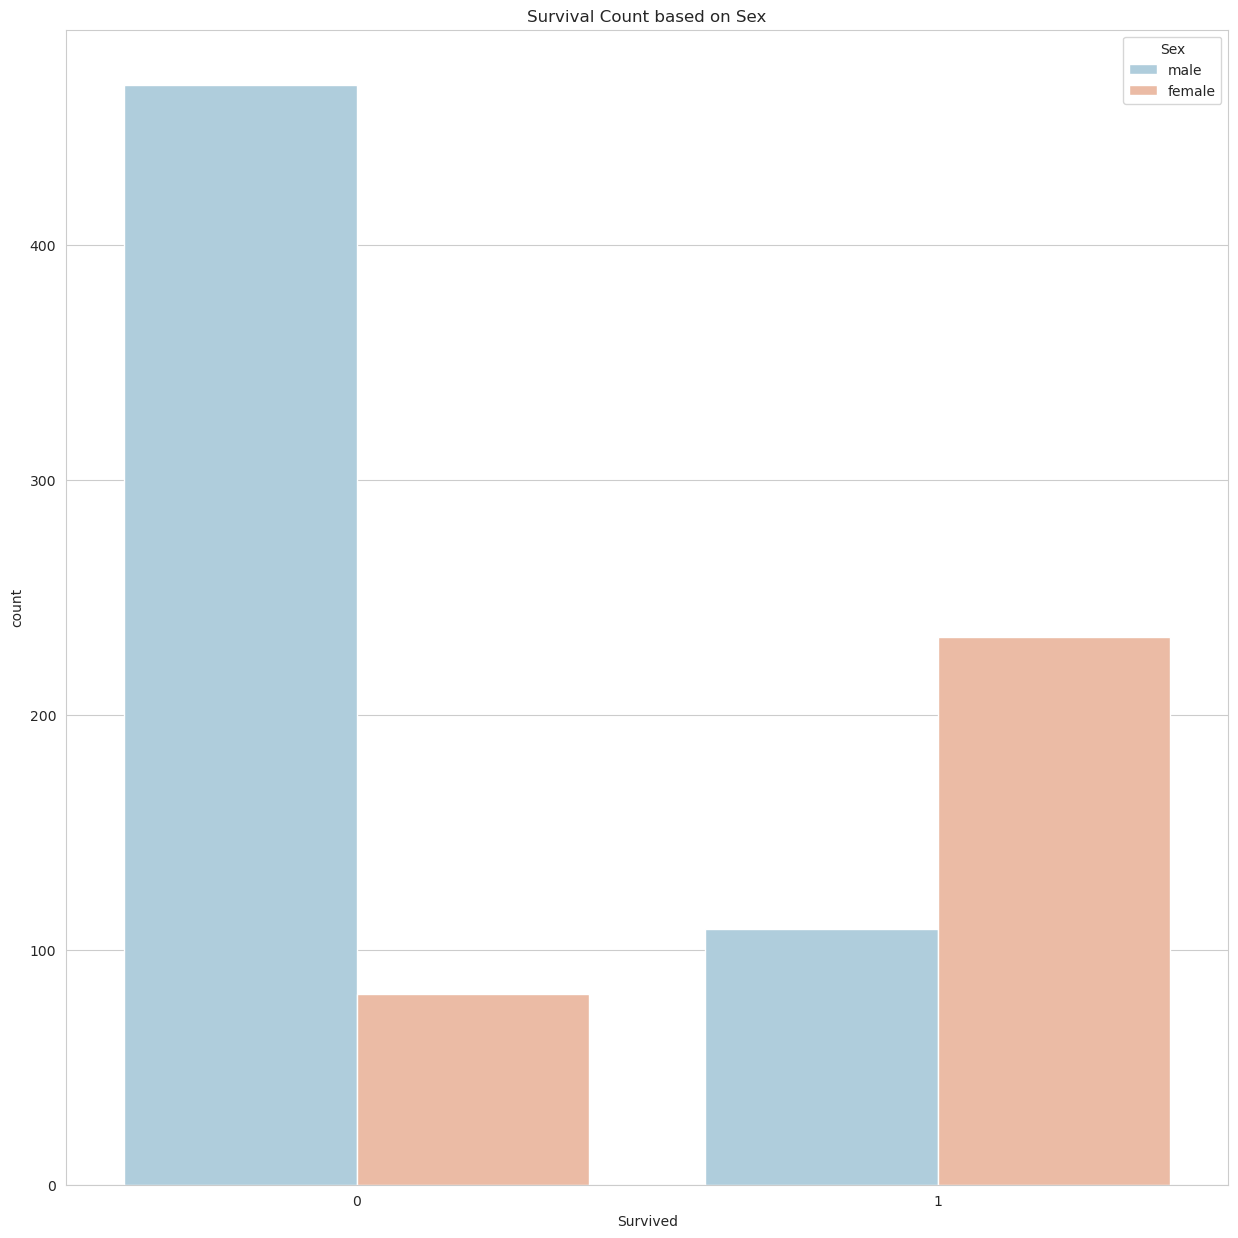

In [411]:
plt.figure(figsize=(15,15))
plt.title('Survival Count based on Sex')
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df1, palette='RdBu_r', hue='Sex')
plt.show()

countplot of those who survived based on the pclass

In [412]:
df1[(df1['Pclass'] == '1') & (df1['Survived'] == 1)].count()

Survived    136
Pclass      136
Name        136
Sex         136
Age         122
SibSp       136
Parch       136
Fare        136
Embarked    134
dtype: int64

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


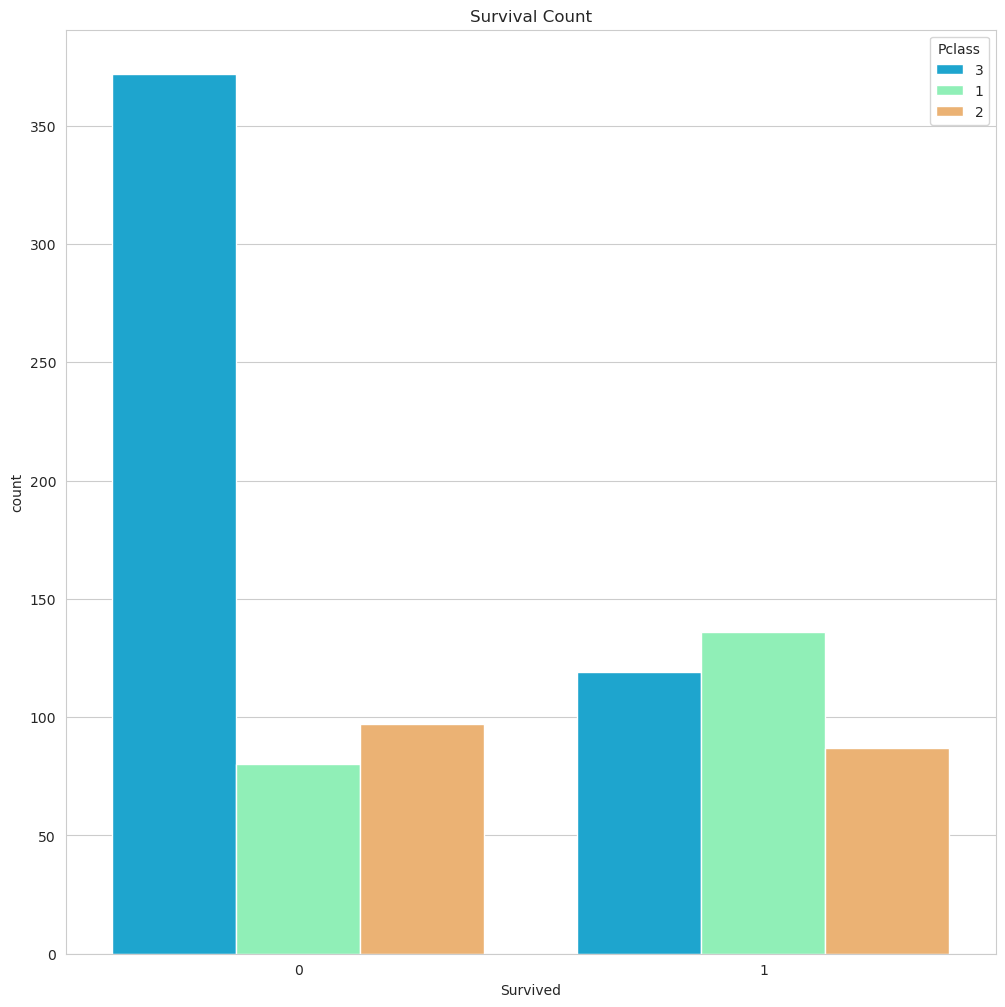

In [413]:
plt.figure(figsize=(12,12))
plt.title('Survival Count')
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df1, palette='rainbow', hue='Pclass')
plt.show()

#### Distribution plot

Distribution of our Passengers

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x1500 with 0 Axes>

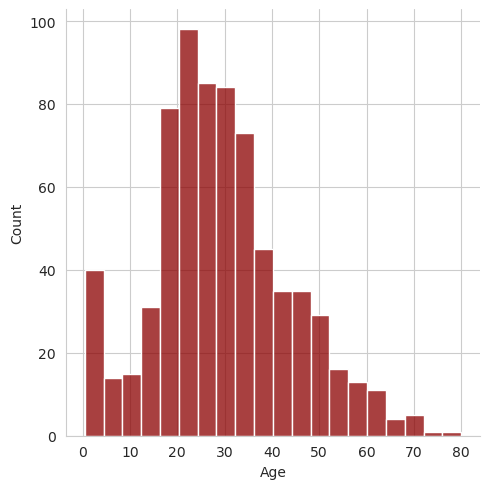

In [414]:
plt.figure(figsize=(15,15))
sns.displot(df1['Age'].dropna(), color='darkred', kde=False, bins=20)
plt.show()

#### Siblings Spouse count

In [415]:
df1['SibSp'].unique()


array(['1', '0', '3', '4', '2', '5', '8'], dtype=object)

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


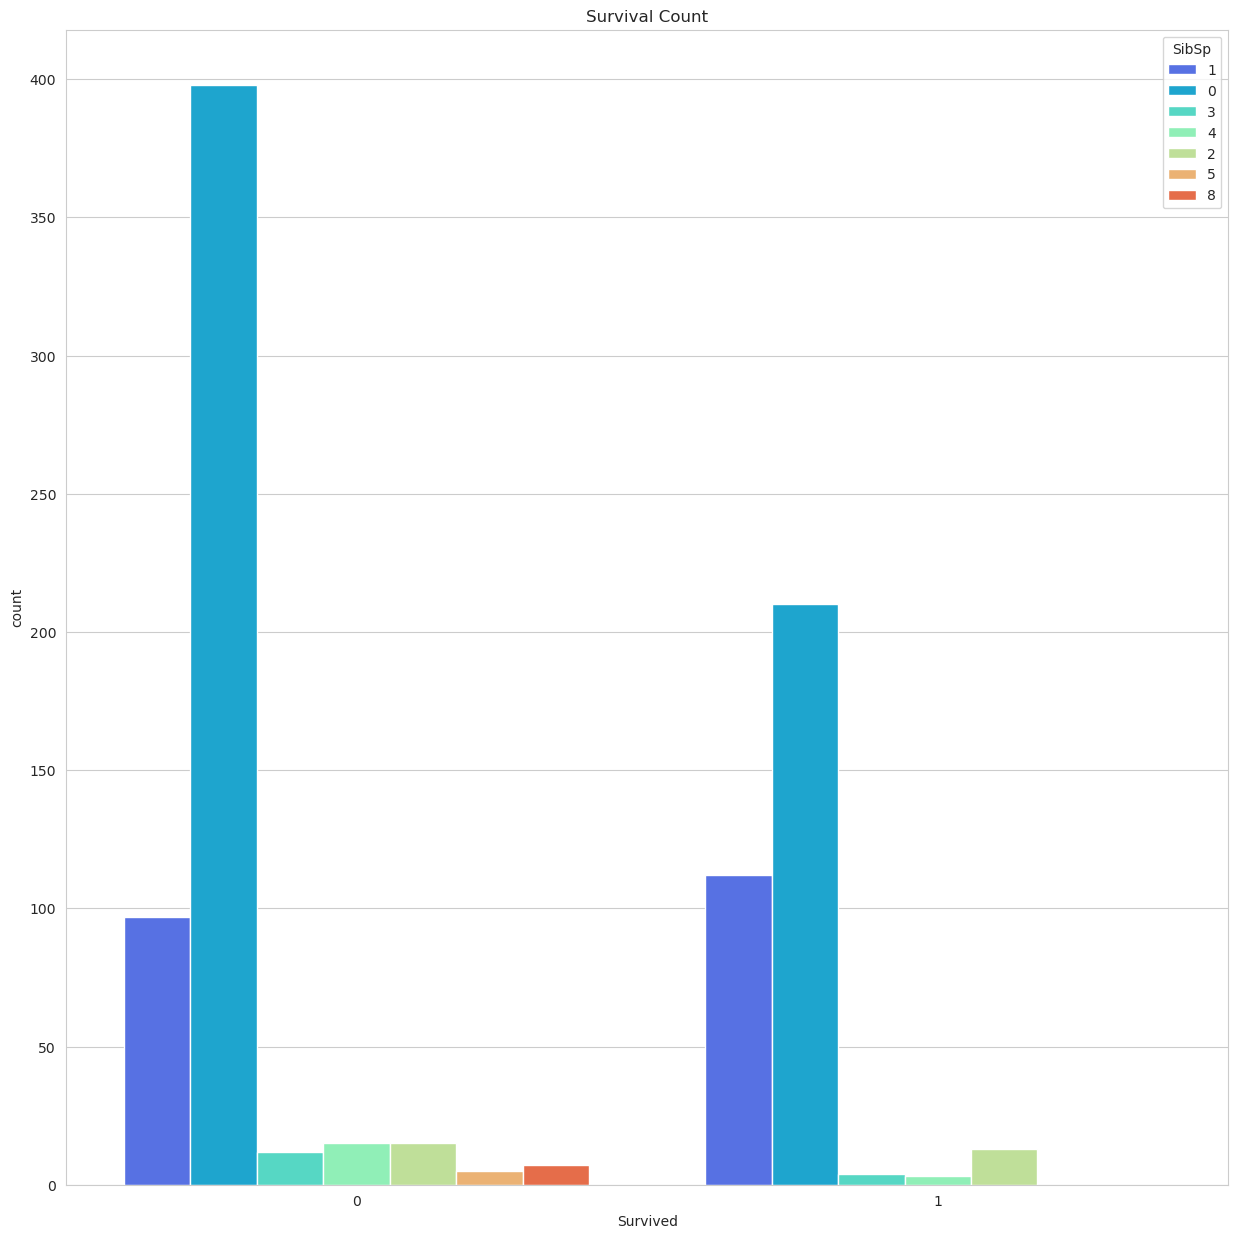

In [416]:
plt.figure(figsize=(15,15))
plt.title('Survival Count')
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df1, palette='rainbow', hue='SibSp')
plt.show()

<Axes: >

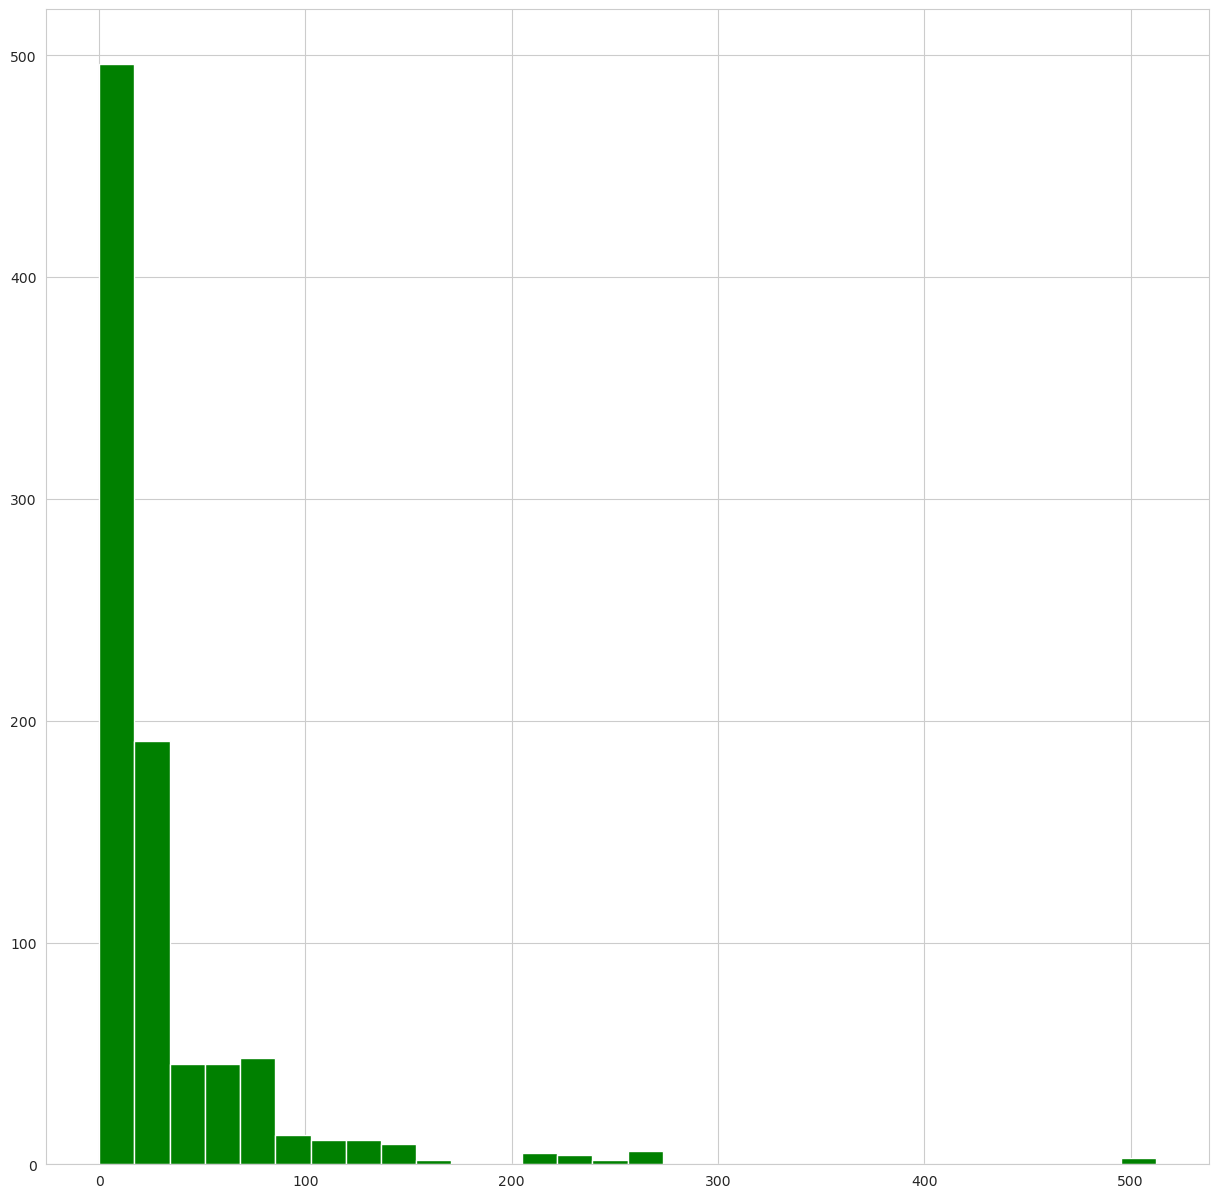

In [417]:
df1['Fare'].hist(color='green', bins=30, figsize=(15,15))

/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/onscript/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='Fare', ylabel='Count'>

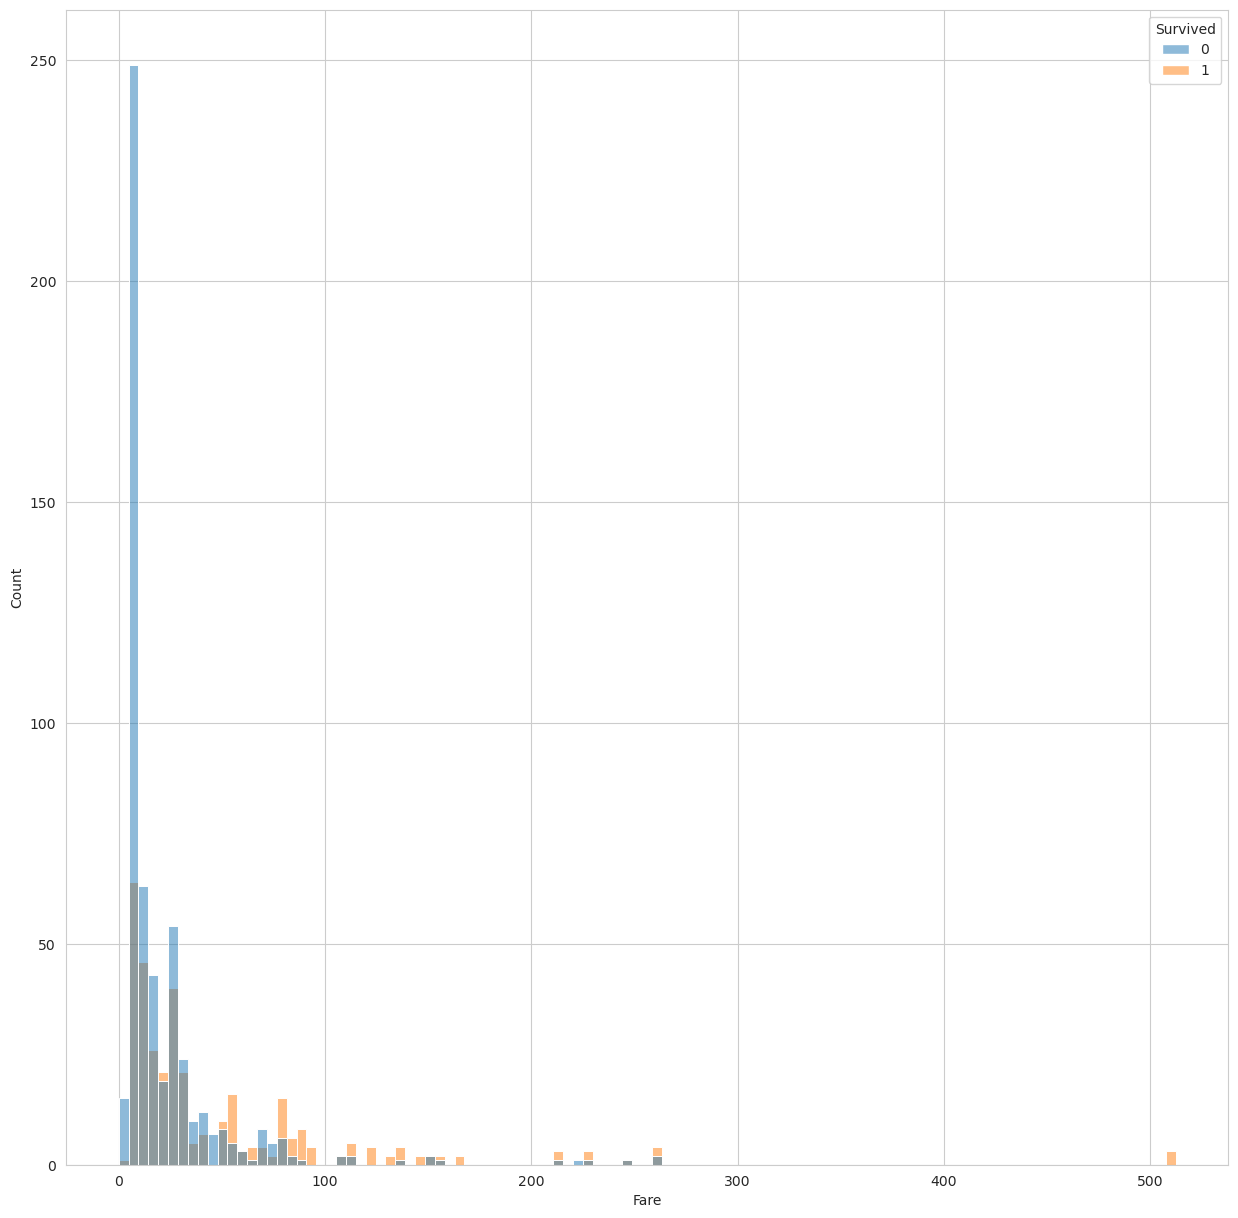

In [418]:
plt.figure(figsize=(15,15))
sns.histplot(x='Fare', hue='Survived', data=df1)

<Axes: xlabel='Pclass', ylabel='Age'>

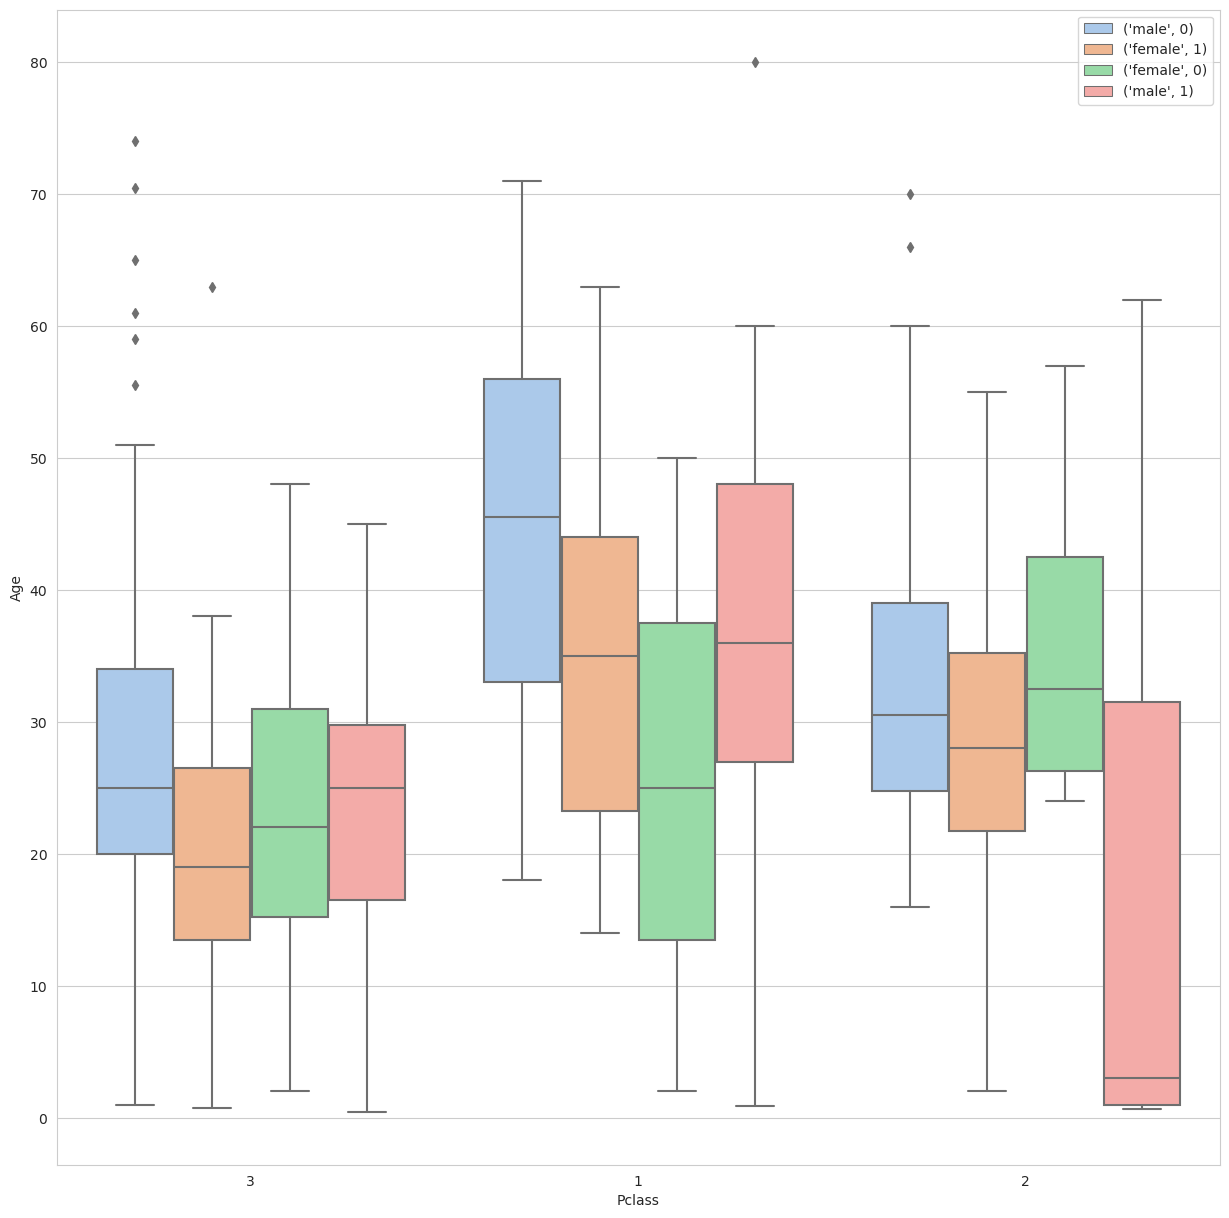

In [419]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Pclass', y='Age', hue=df1[['Sex','Survived']].apply(tuple, axis=1), data=df1, palette='pastel')

#### Filling in Nan value with the mean
`
df1.loc[(df1.Pclass == '1') & (df1.Survived == 0) & (df1.Sex == 'male')].Age.mean()
`

checking for Nan value in a row

`pd.isna(df1.iloc[888])
`

result

```
Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked    False
Name: 888, dtype: bool

```

In [575]:
cols = df1.iloc[]
cols

SyntaxError: invalid syntax (2236321274.py, line 1)

In [ ]:
def fill_nan_age(cols):
    Age = cols[4]
    p_class = cols[1]
    survive = cols[0]
    gender = cols[3]
    
    age = int(round(df1.loc[(df1.Pclass == p_class) & (df1.Survived == survive) & (df1.Sex == gender)].Age.mean(),0))
    if pd.isna(Age):
        return age
    else:
        return Age

In [579]:
def fill_nan_age(cols):
    
    Age = cols['Age']
    p_class = cols[1]
    survive = cols[0]
    gender = cols[3]
    
    age = int(round(df1.loc[(df1.Pclass == p_class) & (df1.Survived == survive) & (df1.Sex == gender)].Age.mean(),0))
    if pd.isna(Age):
        return age
    else:
        return Age
  

In [580]:
df1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [578]:
df2 = df1.apply(fill_nan_age, axis=1)
df2

/tmp/ipykernel_29001/3653271997.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[4]
/tmp/ipykernel_29001/3653271997.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_class = cols[1]
/tmp/ipykernel_29001/3653271997.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  survive = cols[0]
/tmp/ipykernel_29001/3653271997.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

dtype('float64')

In [566]:
def testing(ind):
    cols = df1.iloc[ind]

    Age = cols[4]
    p_class = cols[1]
    survive = cols[0]
    gender = cols[3]

    age = int(round(df1.loc[(df1.Pclass == p_class) & (df1.Survived == survive) & (df1.Sex == gender)].Age.mean(),0))

    print('Age = ',Age)
    print('age =',age)

    if pd.isna(Age):
        print(Age)
    else:
        print(age)
        

In [570]:
x = df1.loc[(df1.Pclass == '1') & (df1.Survived == 0) & (df1.Sex == 'female')]
x.index

Index([177, 297, 498], dtype='int64')

In [571]:
for i in x.index:
    testing(i)
    print('-----')

Age =  50.0
age = 26
26
-----
Age =  2.0
age = 26
26
-----
Age =  25.0
age = 26
26
-----


/tmp/ipykernel_29001/2781069753.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[4]
/tmp/ipykernel_29001/2781069753.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_class = cols[1]
/tmp/ipykernel_29001/2781069753.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  survive = cols[0]
/tmp/ipykernel_29001/2781069753.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

25.666666666666668

In [436]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Survived = cols[2]
    gender = cols[3]
    
    if pd.isna(Age):
        if Pclass == 1 and Survived == 0 and gender == 'male':
            return 46
        elif Pclass == 1 and Survived == 1 and gender == 'male':
            return 35
        elif Pclass == 1 and Survived == 0 and gender == 'female':
            return 25
        elif Pclass == 1 and Survived == 1 and gender == 'female':
            return 35
        
        elif Pclass == 2 and Survived == 0 and gender == 'male':
            return 31
        elif Pclass == 2 and Survived == 1 and gender == 'male':
            return 3
        elif Pclass == 2 and Survived == 0 and gender == 'female':
            return 33
        elif Pclass == 2 and Survived == 1 and gender == 'female':
            return 28
        
        elif Pclass == 3 and Survived == 0 and gender == 'male':
            return 25
        elif Pclass == 3 and Survived == 1 and gender == 'male':
            return 25
        elif Pclass == 3 and Survived == 0 and gender == 'female':
            return 22
        elif Pclass == 3 and Survived == 1 and gender == 'female':
            return 19
        else:
            return Age # This is to catch any nan values that fall out of range
    else:
        return Age

In [437]:
df1['Age'] = df1[['Age', 'Pclass', 'Survived', 'Sex']].apply(inpute_age, axis=1)

/tmp/ipykernel_29001/1872885051.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_29001/1872885051.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]
/tmp/ipykernel_29001/1872885051.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Survived = cols[2]
/tmp/ipykernel_29001/1872885051.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version,

In [441]:
df1.Age.isna().sum()

177

In [438]:
df1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [423]:
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [424]:
df1[df1['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [425]:
df1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [392]:
df1['Embarked'].count()

889

In [393]:
644 + 168 + 77

889